In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Starting the fact challenge table

In [52]:
fact_challenge = pd.read_csv("fact_challenge.csv", nrows=1000000)
fact_challenge.shape

(1000000, 7)

In [53]:
fact_challenge.head()

,event,event_ts,user_id,challenge_id,challenge_object_count,color_id,item_id
0,assign_color,1980-10-11 02:14:00.498,2690,0,10.0,3191,1
1,assign_color,1980-10-11 02:13:40.199,2690,0,10.0,1560,5
2,assign_color,1980-10-11 02:13:52.558,2690,0,10.0,816,18
3,assign_color,1980-10-11 02:13:47.760,2690,0,10.0,2799,21
4,assign_color,1980-10-11 02:13:43.513,2690,0,10.0,770,23


In [54]:
fact_challenge.describe()

,user_id,challenge_id,challenge_object_count,color_id,item_id
count,1000000.000000,1000000.000000,995776.000000,1000000.000000,1000000.000000
mean,90962.884620,55.447107,12.758792,1557.513994,17.919371
std,53000.092901,34.565292,2.445460,1029.402597,11.813290
min,2690.000000,0.000000,5.000000,0.000000,0.000000
25%,43581.000000,14.000000,11.000000,816.000000,5.000000
50%,89198.000000,72.000000,12.000000,1381.000000,21.000000
75%,137434.000000,83.000000,15.000000,2338.000000,27.000000
max,183579.000000,96.000000,19.000000,3535.000000,52.000000


<AxesSubplot:>

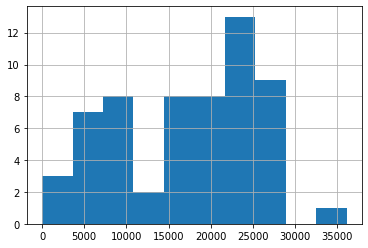

In [55]:
values = fact_challenge["challenge_id"].value_counts()
values.hist()

In [56]:
fact_challenge.isnull().sum().sum()
fact_challenge = fact_challenge.dropna()
fact_challenge.shape

(995776, 7)

In [57]:
assign_color_df = fact_challenge.loc[fact_challenge['event'] == "assign_color"]
assign_color_df = assign_color_df.drop(["event"], axis=1)

In [58]:
assign_color_df.head()

,event_ts,user_id,challenge_id,challenge_object_count,color_id,item_id
0,1980-10-11 02:14:00.498,2690,0,10.0,3191,1
1,1980-10-11 02:13:40.199,2690,0,10.0,1560,5
2,1980-10-11 02:13:52.558,2690,0,10.0,816,18
3,1980-10-11 02:13:47.760,2690,0,10.0,2799,21
4,1980-10-11 02:13:43.513,2690,0,10.0,770,23


In [59]:
assign_color_df = assign_color_df.drop(["event_ts", "challenge_object_count"], axis=1)
assign_color_df.head()

,user_id,challenge_id,color_id,item_id
0,2690,0,3191,1
1,2690,0,1560,5
2,2690,0,816,18
3,2690,0,2799,21
4,2690,0,770,23


In [60]:
assign_color_df

,user_id,challenge_id,color_id,item_id
0,2690,0,3191,1
1,2690,0,1560,5
2,2690,0,816,18
3,2690,0,2799,21
4,2690,0,770,23
...,...,...,...,...
999995,183579,12,3507,33
999996,183579,14,140,1
999997,183579,14,1725,3
999998,183579,14,3474,5


In [61]:
assign_color_df.head()

,user_id,challenge_id,color_id,item_id
0,2690,0,3191,1
1,2690,0,1560,5
2,2690,0,816,18
3,2690,0,2799,21
4,2690,0,770,23


In [62]:
assign_color_df.loc[assign_color_df["color_id"] == 706]
#assign_color_df[assign_color_df.loc["color_id"] == 706]

,user_id,challenge_id,color_id,item_id
4293,3306,15,706,29
20237,5895,0,706,33
20293,5895,5,706,7
71730,11730,5,706,7
76642,12741,5,706,7
83156,14234,5,706,7
88058,15169,14,706,5
97552,17050,92,706,7
122813,22754,92,706,7
143014,26931,92,706,7


In [63]:
assign_color_df.describe()

,user_id,challenge_id,color_id,item_id
count,923611.000000,923611.000000,923611.000000,923611.000000
mean,90998.942992,54.766055,1680.524033,19.331234
std,53032.225804,34.783700,967.929845,11.102012
min,2690.000000,0.000000,2.000000,0.000000
25%,43581.000000,14.000000,828.000000,7.000000
50%,89235.000000,71.000000,1560.000000,23.000000
75%,137472.000000,83.000000,2415.000000,29.000000
max,183579.000000,96.000000,3535.000000,52.000000


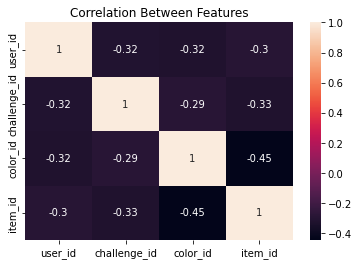

In [64]:
corr_matrix = assign_color_df.corr()
sns.heatmap(corr_matrix.corr(method='pearson'),annot=True)
plt.title("Correlation Between Features")
plt.show()

In [65]:
import datetime
date_time_str = '2018-06-29 08:15:27.243860'
date_time_obj = datetime.datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S.%f')
date_time_obj

datetime.datetime(2018, 6, 29, 8, 15, 27, 243860)

In [66]:
fact_challenge = pd.read_csv("fact_challenge.csv",nrows=1000000)
color_and_item = fact_challenge.loc[fact_challenge['event'] == "assign_color"]
color_and_item = color_and_item[["color_id", "item_id"]]
color_and_item

,color_id,item_id
0,3191,1
1,1560,5
2,816,18
3,2799,21
4,770,23
...,...,...
999995,3507,33
999996,140,1
999997,1725,3
999998,3474,5


In [67]:
item_color_lst = list(zip(color_and_item.color_id, color_and_item.item_id))
item_color_lst

[(3191, 1),
 (1560, 5),
 (816, 18),
 (2799, 21),
 (770, 23),
 (1115, 25),
 (669, 27),
 (2850, 29),
 (572, 31),
 (2394, 33),
 (2327, 1),
 (811, 3),
 (2914, 5),
 (1966, 7),
 (830, 9),
 (2189, 18),
 (1431, 21),
 (770, 23),
 (655, 25),
 (770, 27),
 (1944, 29),
 (1526, 31),
 (1923, 33),
 (2265, 1),
 (1152, 3),
 (1770, 5),
 (1966, 7),
 (3494, 18),
 (1947, 21),
 (3519, 23),
 (466, 25),
 (830, 27),
 (3296, 29),
 (1562, 31),
 (2362, 33),
 (1563, 1),
 (2411, 3),
 (830, 5),
 (1115, 18),
 (1806, 21),
 (1947, 23),
 (816, 25),
 (242, 27),
 (830, 29),
 (1966, 31),
 (1141, 33),
 (829, 1),
 (1966, 3),
 (2327, 5),
 (1141, 7),
 (2624, 9),
 (818, 11),
 (812, 13),
 (830, 18),
 (812, 21),
 (833, 23),
 (829, 25),
 (811, 27),
 (816, 29),
 (816, 31),
 (811, 33),
 (1314, 1),
 (2301, 3),
 (2566, 5),
 (247, 7),
 (3461, 9),
 (2799, 18),
 (2566, 21),
 (2566, 23),
 (3494, 25),
 (812, 27),
 (947, 29),
 (812, 31),
 (649, 33),
 (3409, 1),
 (830, 3),
 (2394, 5),
 (837, 18),
 (3068, 21),
 (1132, 23),
 (3519, 25),
 (2104,

In [68]:
import collections
occurrences_scores = collections.Counter(item_color_lst)
occurrences_scores

Counter({(3191, 1): 17,
         (1560, 5): 435,
         (816, 18): 1403,
         (2799, 21): 90,
         (770, 23): 184,
         (1115, 25): 152,
         (669, 27): 58,
         (2850, 29): 16,
         (572, 31): 56,
         (2394, 33): 31,
         (2327, 1): 22,
         (811, 3): 794,
         (2914, 5): 349,
         (1966, 7): 229,
         (830, 9): 1602,
         (2189, 18): 58,
         (1431, 21): 111,
         (655, 25): 24,
         (770, 27): 187,
         (1944, 29): 1188,
         (1526, 31): 51,
         (1923, 33): 112,
         (2265, 1): 6,
         (1152, 3): 4,
         (1770, 5): 7,
         (3494, 18): 97,
         (1947, 21): 81,
         (3519, 23): 339,
         (466, 25): 44,
         (830, 27): 6498,
         (3296, 29): 57,
         (1562, 31): 85,
         (2362, 33): 36,
         (1563, 1): 35,
         (2411, 3): 36,
         (830, 5): 4669,
         (1115, 18): 111,
         (1806, 21): 2413,
         (1947, 23): 114,
         (816, 25): 1248,
  

In [69]:
for key, val in occurrences_scores.items():
    occurrences_scores[key] /= max(occurrences_scores.values())
    occurrences_scores[key] = 1 - occurrences_scores[key]

In [70]:
occurrences_scores

Counter({(3191, 1): 0.997383810403201,
         (1560, 5): 0.933056325023084,
         (816, 18): 0.7840874115112342,
         (2799, 21): 0.9861495844875346,
         (770, 23): 0.9716835949522931,
         (1115, 25): 0.9766081871345029,
         (669, 27): 0.9910741766697445,
         (2850, 29): 0.9975377039088951,
         (572, 31): 0.9913819636811326,
         (2394, 33): 0.9952293013234842,
         (2327, 1): 0.9966143428747307,
         (811, 3): 0.8778085564789166,
         (2914, 5): 0.9462911665127731,
         (1966, 7): 0.9647583871960603,
         (830, 9): 0.7534626038781164,
         (2189, 18): 0.9910741766697445,
         (1431, 21): 0.9829178208679594,
         (655, 25): 0.9963065558633426,
         (770, 27): 0.9712219144352109,
         (1944, 29): 0.817174515235457,
         (1526, 31): 0.9921514312096029,
         (1923, 33): 0.9827639273622654,
         (2265, 1): 0.9990766389658357,
         (1152, 3): 0.9993844259772238,
         (1770, 5): 0.99892274546014

In [71]:
len(occurrences_scores.keys())

32479

In [72]:
fact_challenge = fact_challenge.dropna()
fact_challenge["user_id"].unique()

array([  2690,   2735,   2736, ..., 183494, 183497, 183579], dtype=int64)

In [73]:
def calculate_absolute_leaders(relevent_data, profile_snapshot):
    normlized_peer_and_rating = normlize_data(relevent_data, 'user_id')
    # get last snapshot per user

    # extract only columns: user_id, current_level, total_challanges...
    profile_snapshot_relevent_cols = profile_snapshot[['user_id','current_level_pass', 'total_n_challenge_publish_lt', 'total_challenges_publish_last_30_days']]
    normlized_level_and_challanges = normlize_data(profile_snapshot_relevent_cols, 'user_id')
    merged_df= pd.merge(normlized_peer_and_rating, normlized_level_and_challanges, how='inner', on = 'user_id').values

    only_features = merged_df[:,1:6]
    user_ids = merged_df[:,0:1]
    weights_vector = [0.2, 0.3, 0.125, 0.125, 0.25]

    scores = np.matmul(only_features, weights_vector)
    user_ids_scores = np.concatenate((user_ids, scores.reshape((len(scores), 1))), axis =1)
    return user_ids_scores[user_ids_scores[:, 1].argsort()[::-1]]

In [74]:
def normlize_data(df, ignore_col):
    copied_df = df.copy()
    for column in copied_df:
        if(column != "user_id"):
            copied_df[column] = (copied_df[column] - copied_df[column].min()) / \
                                (copied_df[column].max() - copied_df[column].min())
    return copied_df

In [75]:
relevent_user_ids = fact_challenge['user_id'].unique()

In [76]:
challenges_finished = pd.read_csv('challenges_finished.csv')
challenges_finished = challenges_finished[challenges_finished['user_id'].isin(relevent_user_ids)]
relevent_data = challenges_finished[['user_id','rating','peer_position']]
relevent_data = relevent_data.groupby('user_id').mean()

In [77]:
profile_snapshot = pd.read_csv('profile_snapshot.csv')
profile_snapshot = profile_snapshot[profile_snapshot['user_id'].isin(relevent_user_ids)]

# filter -99 values from columns
profile_snapshot = profile_snapshot[(profile_snapshot['current_level_pass']>=0) & (profile_snapshot['total_n_challenge_publish_lt']>=0) & (profile_snapshot['total_challenges_publish_last_30_days']>=0)]

In [78]:
AMOUNT_OF_LEADERS = 50

# list of leader's id's
leaders = calculate_absolute_leaders(relevent_data, profile_snapshot)[:AMOUNT_OF_LEADERS][:, 0]
print(leaders)

# for each tuple of 2 user ids, returns their matching score
matching_matrix = np.zeros(shape=(len(leaders), len(leaders)))

[ 20823.  89985.  81112.  31602.  10638.  73032.  35028.  17950.  67718.
 143913.  88940.  37286.  74585.  97991. 106320.  10632.  29030.  76875.
  15635.  98611.  35796.  40762.   9015.   6271.   7428.  48614.  77374.
 164076.  84107.  37081.  66114.  94479. 127335.  43395.  29265.  34582.
 106326. 118534.  31011.  41164. 151077. 174330.  91927. 141814.  71592.
  47974.  89770.  57152. 108985.  61351.]


In [79]:
def count_amount_of_actions_per_chioce(user_id):
    # filter by action==assign_color
    event_col = fact_challenge["event"]
    fact_challenge_color_events = fact_challenge[event_col == "assign_color"]

    fact_challenge_filtered_by_user = fact_challenge_color_events[fact_challenge["user_id"] == user_id]
    res = fact_challenge_filtered_by_user.groupby(["color_id", "item_id"])["event_ts"].count()
    return res.to_dict()

In [80]:
def count_amount_of_actions_per_chioce_per_user(user_ids):
    # dictionary that takes user_id as key and returns the corresponding dictionary
    action_counts_per_user = {}
    for user in user_ids:
        action_counts_per_user[user] = count_amount_of_actions_per_chioce(user)

    return action_counts_per_user

In [81]:
users_count_dictionary = count_amount_of_actions_per_chioce_per_user(leaders)

In [82]:
def calculate_match_score(users_count_dictionary, i, j):
    setA = set(users_count_dictionary[leaders[i]].keys())
    setB = set(users_count_dictionary[leaders[j]].keys())
    intersect = list(setA.intersection(setB))

    matching_score = 0
    for common_key in intersect:
        minimal = min(users_count_dictionary[leaders[i]][common_key],
                      users_count_dictionary[leaders[j]][common_key])
        matching_score += minimal * occurrences_scores[common_key]
    return matching_score

def init_matching_matrix():
    users_count_dictionary = count_amount_of_actions_per_chioce_per_user(leaders)
    
    for i, user_1 in enumerate(leaders):
        for j, user_2 in enumerate(leaders):
            if matching_matrix[j][i] > 0:
                matching_matrix[i][j] = matching_matrix[j][i]
            if i == j:
                continue

            matching_matrix[i][j] = calculate_match_score(users_count_dictionary, i, j)

init_matching_matrix()
%time

Wall time: 0 ns


In [83]:
matching_matrix

array([[ 0.        , 31.61960947, 28.75165688, ..., 27.69179287,
        23.87986011, 34.03639725],
       [31.61960947,  0.        , 26.33740876, ..., 20.02299412,
        33.08281123, 28.35617708],
       [28.75165688, 26.33740876,  0.        , ..., 33.34760085,
        44.55449229, 18.87987909],
       ...,
       [27.69179287, 20.02299412, 33.34760085, ...,  0.        ,
        29.61624373, 29.01220272],
       [23.87986011, 33.08281123, 44.55449229, ..., 29.61624373,
         0.        , 21.01201869],
       [34.03639725, 28.35617708, 18.87987909, ..., 29.01220272,
        21.01201869,  0.        ]])

Text(0, 0.5, 'Frequency Value')

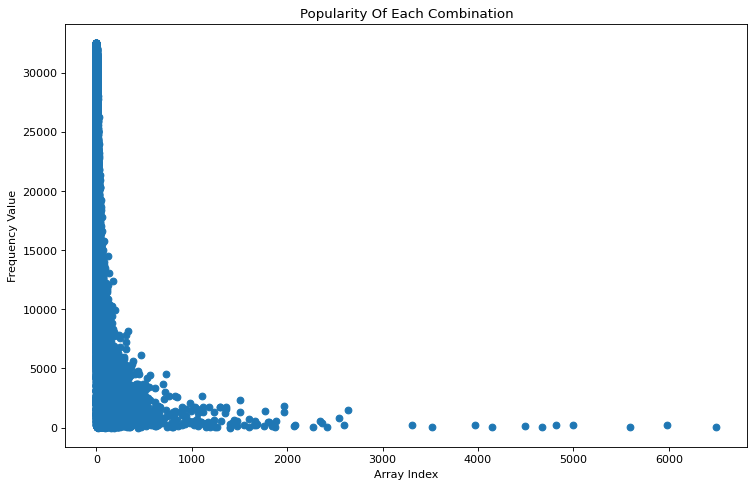

In [84]:
occurences = collections.Counter(item_color_lst)
plt.figure(figsize=(11, 7), dpi=80)
plt.scatter(occurences.values(), list(range(len(occurences.keys()))))
plt.title("Popularity Of Each Combination")
plt.xlabel("Array Index")
plt.ylabel("Frequency Value")

Text(0, 0.5, 'Scores')

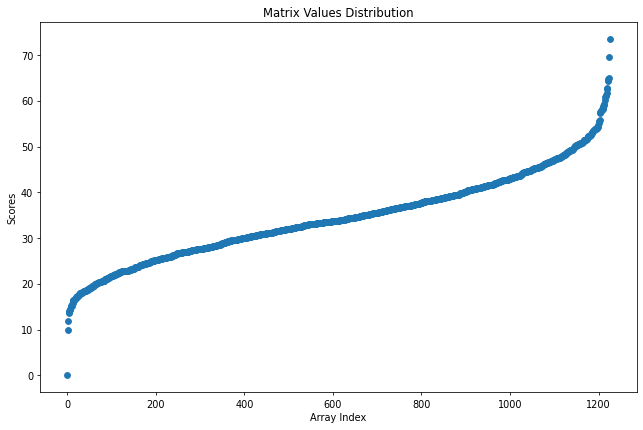

In [85]:
matrix_values = np.unique(matching_matrix)

plt.figure(figsize=(11, 7), dpi=70)
plt.scatter(list(range(matrix_values.shape[0])), matrix_values)
plt.title("Matrix Values Distribution")
plt.xlabel("Array Index")
plt.ylabel("Scores")

In [86]:
import math
np.fill_diagonal(matching_matrix, math.inf)

In [87]:
def find_minimal_threshold(all_leaders):
    global matching_matrix
    # make sure the score is below threshold
    total_min_score = 0
    for row in matching_matrix:
        min_score = row.min(axis=0)
        if total_min_score < min_score:
            total_min_score = min_score
    print(f"total min is: {total_min_score}")
    return total_min_score

In [88]:
def find_good_leaders(all_leaders):
    global matching_matrix
    # make sure the score is below threshold
    total_max_score = 0
    i = 0
    for row in matching_matrix:
        current_row = row.tolist()
        del current_row[i]
        max_score = max(current_row)
        i += 1
        if total_max_score < max_score:
            total_max_score = max_score
    print(f"total min is: {total_max_score}")
    return total_max_score
find_good_leaders(leaders)

total min is: 73.477576358506


73.477576358506

In [89]:
import random

RECOMMEND_AMOUNT = 10
THRESHOLD = find_minimal_threshold(leaders)
random_select = random.randint(0, len(leaders))

total min is: 28.564184818234203


In [90]:
# use random selecting of a candidate then check that he matchs the least to others
# solve collisions with linear hashing
def recommend_for_client(leaders, matching_matrix, recommend_amount=RECOMMEND_AMOUNT):
    all_leaders = leaders.copy()
    tupled_leaders_and_indexes = list(zip(all_leaders, list(range(len(all_leaders)))))

    first_select = random.randint(0, len(tupled_leaders_and_indexes))
    recommended_list = []
    recommended_list.append(tupled_leaders_and_indexes[0])

    del tupled_leaders_and_indexes[first_select]
    
    if recommend_amount >= len(all_leaders):
        print("error")
        return

    for n in range(recommend_amount-1):
        res_array = np.zeros(len(matching_matrix[0]))
        for touple_leader in recommended_list:
            res_array += matching_matrix[touple_leader[1]]
        
        res_array /= len(recommended_list)
        for touple_leader in recommended_list:
            res_array[touple_leader[1]] = math.inf
            
        candidate = np.argmin(res_array)
        recommended_list.append((all_leaders[candidate], candidate))
        tupled_leaders_and_indexes.remove((all_leaders[candidate],candidate))
        
    result = [touple_leader[0] for touple_leader in recommended_list]
    return result

In [91]:
recomend_list = recommend_for_client(leaders, matching_matrix)
print (recomend_list)

[20823.0, 9015.0, 7428.0, 6271.0, 61351.0, 10638.0, 97991.0, 74585.0, 81112.0, 151077.0]
